In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st
import statistics

In [2]:
# read in mask use by country csv file

file_to_load = "Resources/mask-use-by-county-exp.csv"
mask_counties = pd.read_csv("mask-use-by-county-exp.csv")
mask_counties

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,5.30%,7.40%,13.40%,29.50%,44.40%
1,1003,8.30%,5.90%,9.80%,32.30%,43.60%
2,1005,6.70%,12.10%,12.00%,20.10%,49.10%
3,1007,2.00%,3.40%,9.60%,27.80%,57.20%
4,1009,5.30%,11.40%,18.00%,19.40%,45.90%
...,...,...,...,...,...,...
3137,56037,6.10%,29.50%,23.00%,14.60%,26.80%
3138,56039,9.50%,15.70%,16.00%,24.70%,34.00%
3139,56041,9.80%,27.80%,15.40%,20.70%,26.40%
3140,56043,20.40%,15.50%,6.90%,28.50%,28.70%


In [3]:
# total number of counties 
total_counties = mask_counties["COUNTYFP"].nunique()
total_counties_df = pd.DataFrame([total_counties], columns = ["Total Counties"])
total_counties_df

,Total Counties
0,3142


In [4]:
# Average Never- Mask 
# never_mask = mask_counties["NEVER"].apply(percentages_to_floats).mean()
# never_mask


In [5]:
def percentages_to_floats(percentage):
    string = percentage[0:-1]
    return float(string) 

In [6]:
# Average Never - Mask 

mask_counties["NEVER"].apply(percentages_to_floats).mean()


7.993952896244437

In [7]:
# Average Rarely - Mask 
rarely_mask = mask_counties["RARELY"].apply(percentages_to_floats).mean()
print(rarely_mask)

8.291852323360928


In [8]:
# Average Sometimes - Mask 
sometimes_mask = mask_counties["SOMETIMES"].apply(percentages_to_floats).mean()
sometimes_mask 

12.131795035009564

In [9]:
# Average Frequently - Mask 
frequently_mask = mask_counties["FREQUENTLY"].apply(percentages_to_floats).mean()
frequently_mask

20.77246976448119

In [10]:
# Average Always - Mask 
always_mask = mask_counties["ALWAYS"].apply(percentages_to_floats).mean()
always_mask

50.80935709739027

In [11]:
# Determined Mask Score by combining/adding the Frequently & Always cols for a county 

mask_counties["Mask Score"] = mask_counties["FREQUENTLY"].apply(percentages_to_floats) + mask_counties["ALWAYS"].apply(percentages_to_floats)
mask_counties

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Mask Score
0,1001,5.30%,7.40%,13.40%,29.50%,44.40%,73.9
1,1003,8.30%,5.90%,9.80%,32.30%,43.60%,75.9
2,1005,6.70%,12.10%,12.00%,20.10%,49.10%,69.2
3,1007,2.00%,3.40%,9.60%,27.80%,57.20%,85.0
4,1009,5.30%,11.40%,18.00%,19.40%,45.90%,65.3
...,...,...,...,...,...,...,...
3137,56037,6.10%,29.50%,23.00%,14.60%,26.80%,41.4
3138,56039,9.50%,15.70%,16.00%,24.70%,34.00%,58.7
3139,56041,9.80%,27.80%,15.40%,20.70%,26.40%,47.1
3140,56043,20.40%,15.50%,6.90%,28.50%,28.70%,57.2


In [12]:
# Descriptive 

mask_counties["Mask Score"].describe()

count    3142.000000
mean       71.581827
std        13.108013
min        25.500000
25%        62.300000
50%        72.200000
75%        81.900000
max        99.200000
Name: Mask Score, dtype: float64

In [13]:
# read in us-counties-csv in order to tick & tie the fips to the state names, and then start connecting to the mask score
counties = pd.read_csv("us-counties.csv").dropna()
counties["fips"]=counties["fips"].apply(int)
counties = counties[["state", "fips"]]
counties = counties.rename({
    "fips": "COUNTYFP"
},axis=1)
counties

,state,COUNTYFP
0,Alabama,1001
1,Alabama,1003
2,Alabama,1005
3,Alabama,1007
4,Alabama,1009
...,...,...
3134,Wyoming,56037
3135,Wyoming,56039
3136,Wyoming,56041
3137,Wyoming,56043


In [14]:
# merged dataframes in order to get Mask Score to aling with state 

merged_df = mask_counties.merge(counties)
merged_df

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Mask Score,state
0,1001,5.30%,7.40%,13.40%,29.50%,44.40%,73.9,Alabama
1,1003,8.30%,5.90%,9.80%,32.30%,43.60%,75.9,Alabama
2,1005,6.70%,12.10%,12.00%,20.10%,49.10%,69.2,Alabama
3,1007,2.00%,3.40%,9.60%,27.80%,57.20%,85.0,Alabama
4,1009,5.30%,11.40%,18.00%,19.40%,45.90%,65.3,Alabama
...,...,...,...,...,...,...,...,...
3131,56037,6.10%,29.50%,23.00%,14.60%,26.80%,41.4,Wyoming
3132,56039,9.50%,15.70%,16.00%,24.70%,34.00%,58.7,Wyoming
3133,56041,9.80%,27.80%,15.40%,20.70%,26.40%,47.1,Wyoming
3134,56043,20.40%,15.50%,6.90%,28.50%,28.70%,57.2,Wyoming


In [15]:
x_values = merged_df["state"]
y_values = merged_df["Mask Score"]

In [16]:
# plt.bar(x_values, y_values)
# plt.xticks(rotation=90)
# plt.show()

Text(0.5, 1.0, 'Mask Score')

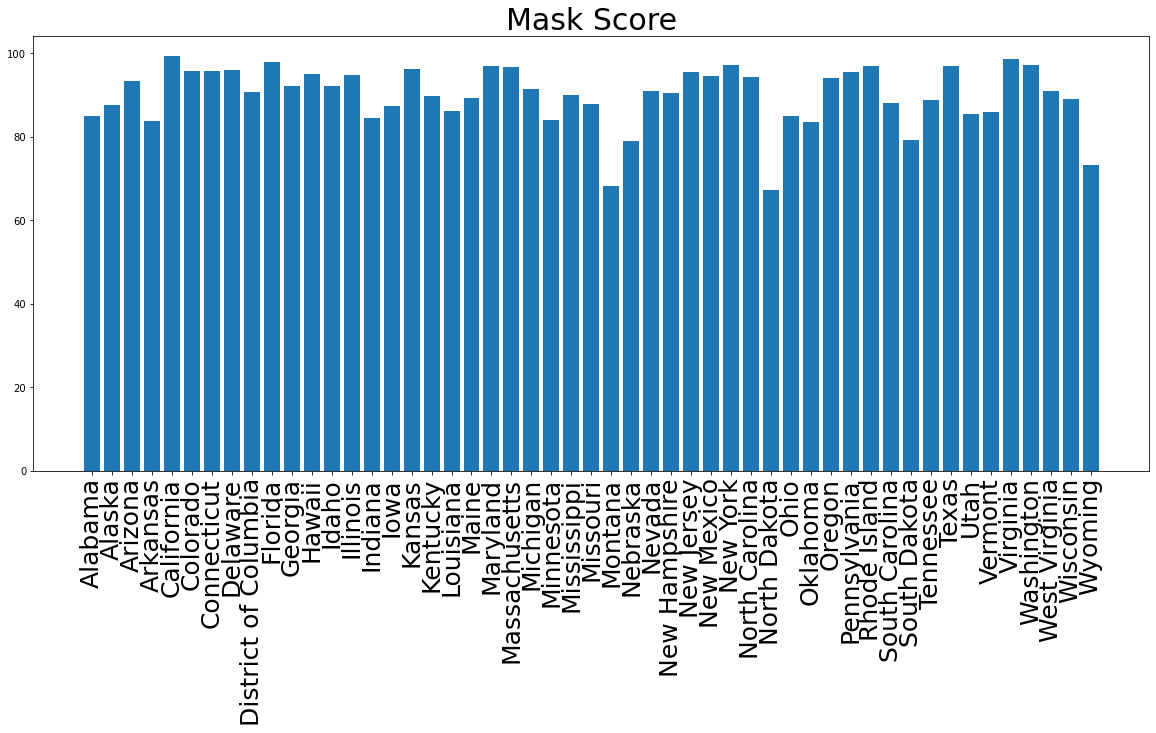

In [18]:
# created bar chart to demonstrate visual of mask score 
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(x_values, y_values)
plt.xticks(rotation=90)
plt.xticks(fontsize=25)
ax.set_title("Mask Score", fontsize=30)
